In [3]:
%matplotlib inline

## Original Image

![title](input.d/pinchOff-0.png)

## Contour Plot

1280 800


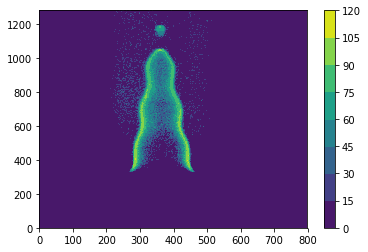

In [4]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

np_map = imageio.imread("input.d/pinchOff-0.png").T[::-1, ::-1]
height, width = np_map.shape
print(height, width)

plt.figure(1)
plt.contourf(np_map)
plt.colorbar()
plt.show()

## Set Threshold

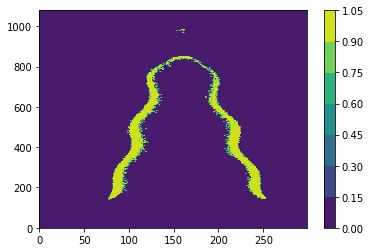

In [5]:
def threshold(np_map, THRESH=75):
    res = np.copy(np_map)
    res[np_map <= THRESH] = False
    res[np_map > THRESH] = True
    return res

np_map1 = threshold(np_map)
plt.figure(2)
plt.contourf(np_map1[200:1280, 200:500])
plt.colorbar()
plt.show()

# Edge Detection

*   [Wikipedia](https://en.wikipedia.org/wiki/Edge_detection)
*   [scikit-image](https://scikit-image.org/docs/dev/auto_examples/edges/plot_edge_filter.html)

## Sobel Algorithm

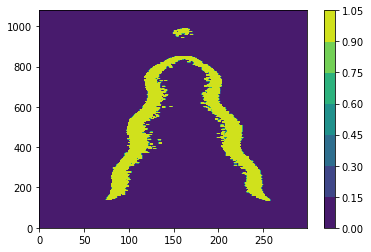

In [6]:
from scipy import ndimage

def sobel(np_map, THRESH=70, THRESH_1 = 15.):
    res = np.copy(np_map)
    res[np_map <= THRESH] = 0
    res_x = ndimage.sobel(res, axis=0)
    res_y = ndimage.sobel(res, axis=1)
    res = np.sqrt(res_x**2 + res_y**2)
    res[res <= THRESH_1] = False
    res[res > THRESH_1] = True
    return res

np_map3 = sobel(np_map)
plt.figure(3)
plt.contourf(np_map3[200:1280, 200:500])
plt.colorbar()
plt.show()

## Canny Algorithm

*   [scikit-learn](https://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html)

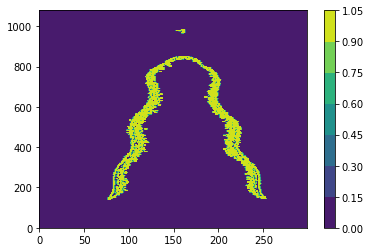

In [7]:
from skimage import feature

def canny(np_map, THRESH=75, SIGMA=0.5):
    res = np.copy(np_map)
    res[np_map <= THRESH] = 0
    res = feature.canny(1. * res, sigma=SIGMA)
    return res

np_map4 = canny(np_map)
plt.figure(4)
plt.contourf(np_map4[200:1280, 200:500])
plt.colorbar()
plt.show()

# Ridge Detection

*   [Wikipedia](https://en.wikipedia.org/wiki/Ridge_detection)
*   [scikit-image](https://scikit-image.org/docs/dev/auto_examples/edges/plot_ridge_filter.html)

## Meijering Filter

In [8]:
from skimage import filters

def meijering(np_map, THRESH=75, BLACK=0.4):
    res = np.copy(np_map)
    res[np_map <= THRESH] = 0
    res = filters.meijering(res, black_ridges=False)
    res[np.where(res <= BLACK)] = False
    res[np.where(res > BLACK)] = True
    return res

np_map5 = meijering(np_map)
plt.figure(5)
plt.contourf(np_map5[200:1280, 200:500])
plt.colorbar()
plt.show()

AttributeError: module 'skimage.filters' has no attribute 'meijering'

## Sato Filter

In [9]:
def sato(np_map, THRESH=75, BLACK=0.04):
    res = np.copy(np_map)
    res[np_map <= THRESH] = 0
    res = filters.sato(res, black_ridges=False)
    res[np.where(res <= BLACK)] = False
    res[np.where(res > BLACK)] = True
    return res

np_map6 = sato(np_map)
plt.figure(6)
plt.contourf(np_map6[200:1280, 200:500])
plt.colorbar()
plt.show()

AttributeError: module 'skimage.filters' has no attribute 'sato'

## Frangi Filter

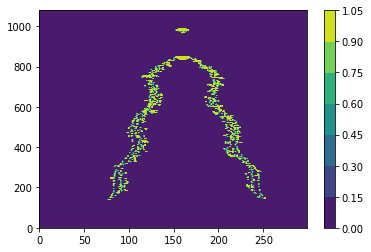

In [10]:
def frangi(np_map, THRESH=75, BLACK=0.000003):
    res = np.copy(np_map)
    res[np_map <= THRESH] = 0
    res = filters.frangi(res, black_ridges=False)
    res[np.where(res <= BLACK)] = False
    res[np.where(res > BLACK)] = True
    return res

np_map7 = frangi(np_map)
plt.figure(7)
plt.contourf(np_map7[200:1280, 200:500])
plt.colorbar()
plt.show()

# Unsteady Case

KeyboardInterrupt: 

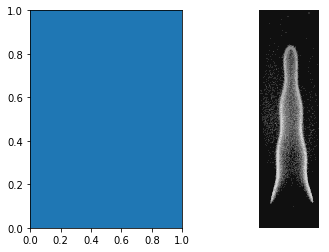

In [11]:
from matplotlib import gridspec

input_map = np.zeros((height, width), dtype='uint8')
output_map = np.zeros((height, width), dtype='uint8')

OUTLET = 333
CENTER = 355
RADIUS = 108

plt.ioff()
for image_it in range(2001):
    input_map[:, :] = imageio.imread("input.d/pinchOff-{}.png".format(image_it)).T[::-1, ::-1]
    output_map[:, :] = threshold(input_map)
    
    # Output.
    fig = plt.figure(image_it)
    ax = fig.gca()
    h = ax.contourf(output_map[200:1280, 200:500])
    fig.colorbar(h)
    fig.savefig("output.d/pinchOff-{}.png".format(image_it))
    plt.close(fig)
    
    # Inout.
    fig = plt.figure()
    gs = gridspec.GridSpec(1, 2)
    
    ax = plt.subplot(gs[0, 1])
    ax.contourf(input_map[200:1280, 200:500], cmap='gray')
    ax.set_axis_off()
    ax.set_aspect('equal')
    
    ax = plt.subplot(gs[0, 0])
    ax.contourf(output_map[200:1280, 200:500])
    ax.set_aspect('equal')
    
    fig.savefig("inout.d/pinchOff-{}.png".format(image_it))
    plt.close(fig)
    
    # Write text files.
    f = open("visualisation.ref/surf_{}.dat".format(image_it), 'w')
    f.write("{}\n".format(np.nonzero(np.nonzero(output_map == True)[1] >= CENTER)[0].size))
    for loc_it in np.transpose(np.nonzero(output_map == True)):
        x = loc_it[1]
        y = loc_it[0]
        if x < CENTER:
            continue
        x = (x - CENTER) / RADIUS
        y = (y - OUTLET) / RADIUS
        f.write("{}\t{}\n".format(x, y))
    f.close()
plt.ion()